# Innlevering 4 &mdash; Numerisk integrasjon

**TMA4400 Matematikk 1: Kalkulus og lineær algebra**

Innleveringsfrist: **14. november 2025, klokka 16.00**

---

_Du **skal** levere besvarelsen din som en pdf-fil i <a href="https://ovsys.math.ntnu.no/login/?next=/">Ovsys</a>. Der skal du også legge ved all kode du eventuelt bruker._ 

_Du kan ta utgangspunkt i denne Jupyter notebook-en, endre den, lagre den som pdf, og levere den inn._

---

<a href="https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution">Standardnormalfordelingen</a> er gitt ved 

$$
    f(x) = \frac{1}{\sqrt{2\pi}} e^{-x ^2/2}.
$$

La oss plotte denne.

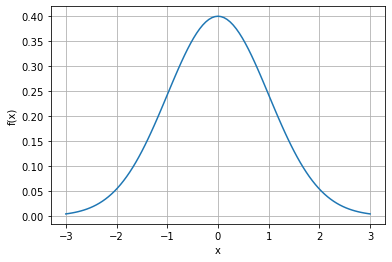

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# vi definerer funksjonen
def f(x):                        
    return (1/np.sqrt(2*np.pi))*np.exp(-0.5*x**2)

# vi plotter denne
x = np.linspace(-3, 3, 101)
plt.plot(x, f(x))

plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

Dette er et eksempel på en sannsynlighetstetthetsfunksjon, 
og for TMA4400 holder det å vite at sannsynligheten for å havne mellom $a$ og $b$ er gitt ved 

$$
\frac{1}{\sqrt{2\pi}} \int_a^b e^{-x ^2/2} \; dx.
$$

Det er bare ett problem - standardnormalfordelingen har ikke en eksplisitt gitt antiderivert. 

Under er en kode for å beregne arealet ved hjelp av rektangelmetoden

\begin{align*}
\int_a^b f(x) \ dx &\approx \frac{b-a}{n} \sum_{i=0}^{n-1}f(x_i),\qquad \text{der $x_{i}=a+i\frac{b-a}{n}$ for $i=0,1,\dots,n$.}
\end{align*}

In [2]:
def rektangel(f, a, b, n):
# vi finner en approksimasjon av integralet ved rektangelmetoden
# Input:  
#   f:    integranden
#   a, b: integrasjonsintervallet
#   n:    antall delintervall
# Output: approksimasjonen av integralet
    x_noder = np.linspace(a, b, n+1)       # jevnt fordelte noder fra a til b 
    h = (b-a)/n                            # steglengden
    R = h*(sum(f(x_noder[0:n])))           # summerer f(x_0), f(x_1), ... , f(x_{n-1})
    return (n, R)

In [3]:
def f(x):                        # integranden
    return (1/np.sqrt(2*np.pi))*np.exp(-0.5*x**2)
a, b = 0, 1                     # integrasjonsintervallet
n = 10                           # antall delintervaller
(n, R) = rektangel(f, a, b, n)   # numerisk løsning   
print('n = {:3d}, Approksimasjon = {:.8f}'.format(n,R))

n =  10, Approksimasjon = 0.34899161


Rektangelmetoden er basert på å velge nodene i venstre endepunkt av delintervallene. En annen måte er å velge nodene i midten av delintervallene. Dette kalles midtpunktmetoden, og den er gitt ved

$$
\int_a^b f(x) \ dx \approx \frac{b-a}{n}\sum_{i=0}^{n-1}f(m_i),\qquad \text{der $m_i=\frac{1}{2}(x_{i}+x_{i+1})$.}
$$

<ol type="1." start="1.">
<li> Modifiser koden til å beregne arealet ved midtpunktmetoden. Kjør koden med $a=0$ og $b=1$, og sammenlign begge metoder med den korrekte sannsynligheten

$$
\frac{1}{\sqrt{2\pi}} \int_0^1 e^{-x ^2/2} \; dx \approx 0.3413447460685429485852.
$$
</li>
</ol>

For rektangelmetoden kan vi teste hvordan feilen var avhengig av $n$ med følgende kode:

In [4]:
a, b = 0, 1
I_eksakt = 0.3413447460685429485852  # vi regner ut integralet

for n in [1,2,4,8,16,32,64,128,256,512]:
    (n, R) = rektangel(f, a, b, n=n) # numerisk løsning   
    err = abs(I_eksakt-R)            # feil
    if n == 1:
        print('n = {:3d},  error = {:.3e}'.format(n, err))
    else:
        print('n = {:3d},  error = {:.3e}, reduction factor = {:.3e}'
              .format(n, err, err/err_prev))
    err_prev=err

n =   1,  error = 5.760e-02
n =   2,  error = 3.416e-02, reduction factor = 5.931e-01
n =   4,  error = 1.836e-02, reduction factor = 5.374e-01
n =   8,  error = 9.495e-03, reduction factor = 5.172e-01
n =  16,  error = 4.827e-03, reduction factor = 5.083e-01
n =  32,  error = 2.433e-03, reduction factor = 5.041e-01
n =  64,  error = 1.221e-03, reduction factor = 5.020e-01
n = 128,  error = 6.119e-04, reduction factor = 5.010e-01
n = 256,  error = 3.063e-04, reduction factor = 5.005e-01
n = 512,  error = 1.532e-04, reduction factor = 5.003e-01


<ol type="1." start="2.">
<li> Test hvordan feilen i midtpunktmetoden avhenger av $n$: Hvor mye reduseres feilen med når antall delintervaller $n$ øker med en faktor $2$?
<p><p>
Sammenlign feilen i midtpunktmetoden med hva du vet for trapesmetoden. Blir du overrasket?
</li>
</ol>

<ol type="1." start="3.">
<li> Bevis at

$$
I = \left|\int_a^b f(x) \ dx - h\sum_{i=0}^{n-1}f(m_i)\right|\leq \frac{K(b-a)^3}{24 n^2},
$$

hvor $K$ er slik at $|f''(x)|\leq K$ for alle $x\in[a,b]$.
<p><p>
Du kan samarbeide med et KI-verktøy (f. eks. NTNU sin <a href="https://i.ntnu.no/wiki/-/wiki/Norsk/Copilot">Copilot</a>) for å komme frem til beviset. Fortell den at du er en førsteårsstudent som tar sitt første matematikkemne ved et universitet, og at du trenger hjelp med feilestimatet for midtpunktmetoden i forbindelse med numerisk integrasjon.
<p><p>
Reflekter over følgende: Hva har du gjort for å sjekke at løsningen som foreslås er riktig? Hvilke antagelser må du gjøre underveis?
<p><p>
Forklar så hvorfor midtpunktmetoden og trapesmetoden får nesten samme feil.
</li>
</ol>

De numeriske integrasjonsmetodene gir oss et sett med korresponderende teknikker for å løse ordinære differensiallikninger numerisk. La oss si vi ønsker å løse initialverdiproblemet

\begin{align*}
\begin{cases}
y'(t)=F(y(t)),& \qquad t\in(0,t_{\text{end}}],\\
y(0)=y_0.
\end{cases}
\end{align*}

Vi deler tidsintervallet inn i en partisjon med $N+1$ punkter

$$
    t_n = nh, \qquad 0\leq n \leq N
$$

der $h=t_{\text{end}}/N$, og integrerer differensialligningen fra en node til neste:

$$
    y\left( t_{n+1} \right) - y\left( t_n \right) = \int_{t_n}^{t_{n+1}} F\left( y\left( t \right) \right) \ dt.
$$

Integralet på høyresiden kan vi nå approksimere på ulike måter: rektangelmetoden med venstre eller høyre endepunkt, midtpunktmetoden eller trapesmetoden. Hvis vi i tillegg lar $y_n \approx y\left( t_n \right)$, får vi nå fire metoder:

\begin{align*}
    \text{Eulers eksplisitte metode:} \hspace{10mm} &y_{n+1} = y_n + hF\left( y_n \right) \\[3mm]
    \text{Eulers implisitte metode:} \hspace{10mm} &y_{n+1} = y_n + hF\left( y_{n+1} \right) \\[3mm]
    \text{Midtpunktmetoden:} \hspace{10mm} &y_{n+1} = y_n + hF\left( \frac{y_n + y_{n+1}}{2} \right) \\[3mm]
    \text{Trapesmetoden:} \hspace{10mm} &y_{n+1} = y_n + \frac{h}{2}\left( F\left( y_n \right) + F\left( y_{n+1} \right) \right)
\end{align*}

La oss nå studere den logistiske ligningen:

\begin{align*}
\begin{cases}
y'(t)=ry(t)\left( K-y(t) \right),& \qquad t\in(0,t_{\text{end}}],\\
y(0)=y_0,
\end{cases}
\end{align*}

med konstanter $r>0$ og $K>0$.

<ol type="1." start="4.">
<li>  Skriv ned Eulers eksplisitte metode for den logistiske ligningen.
<p><p>
Sammenlign svaret du får med den diskrete logistiske ligninga vi studerte i Innlevering 2. Forklar hvordan $h$, $r$ og $K$ påvirker oppførselen til den numeriske metoden.
</li>
</ol>

Under finner du kode for Eulers eksplisitte metode for den logistiske ligningen.

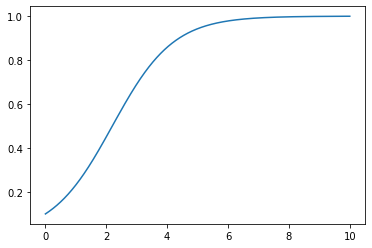

In [5]:
# parametre
r = 1 #vekstfaktor
K = 1 #bærekapasitet

# tidsakse
t_end = 10
N = 10000
h = t_end/N
t = np.linspace(0,t_end,N+1)

# løsning
y = np.zeros(N+1)
y[0] = 0.1
for i in range(N):
    y[i+1] = y[i] + h*r*y[i]*(K-y[i])

plt.plot(t,y)

# her får du generert en fil til figuren
# plt.savefig('logistisk.png') 

<ol type="1." start="5.">
<li>   Vi skal nå implementere Eulers implisitte metode for det logistiske problemet ved å gjøre følgende:
    <ol type="i)" start="i)">
    <li> Ta utgangspunkt i koden for Eulers eksplisitte metode.
    <li> Merk at $y_{n+1}$ er løsningen til ligningen $f(x) = -x + y_n + hF(x)=0$. Implementer Newtons metode for å finne nullpunktet til $f(x)$, altså finne $y_{n+1}$.
    <li> Fullfør nå koden for Eulers implisitte metode.
    </li>
    </ol>
En pseudokode er gitt under.
</li>
</ol>

In [6]:
#(merk at f også er avhengig av parameteren y_i)

# def f(x, y_i): 
    # return -x + y_i + h * F(x) (her må du fylle inn F)

# def df(x, y_i):
    # return ???

# (merk at Newtons metode også må ta inn parameteren y_i)

# def NewtonsMetode(f, df, a, y_i): #(se f.eks. notebooken om Newtons metode)

    # ??? 

    # return verdien for nullpunktet 
    # (merk at NetwonsMetode i tidligere notebook returnerer et array)
    # du kan derfor få bruk for return punkter[-1][0]

#tidsakse

# t_end = 10
# N = 10000
# h = t_end/N
# t = np.linspace(0,t_end,N+1)

#løsning

# y = np.zeros(N+1)
# y[0] = 0.1
# for i in range(N): 
    # y[i+1] = NewtonsMetode(f, df, y[i], y[i])

# plt.plot(t, y)

<ol type="1." start="6.">
<li> Sjekk at du har implementert riktig ved å sammenligne den numeriske løsningen med den analytiske løsningen
<p><p>
$$
y(t)=\frac{Ky_0e^{rt}}{K+y_0(e^{rt}-1)}.
$$
Lag et plott for feilen $e_n=|y(t_n)-y_n|$.
<p><p>
Lag ei løkke som løser ligningen med metoden fra Oppgave 5 med $N = 100 \cdot 2^i$, hvor $i = 0, 1, \ldots, 9$. Lag så en tabell som inneholder de korresponderende verdiene for $h$ og $e_N$. Du kan ta utgangspunkt i psuedokoden nedenfor. Hva kan du si om sammenhengen mellom $e_N$ og $h$?
</li>
</ol>

In [7]:
# t_end = 10

# løsning for hver verdi av N: 

# for i in range(10): 
    # N = 100 * 2**i
    # h = t_end/N
    # t = np.linspace(0, t_end, N+1)

    # y = np.zeros(N+1)
    # y[0] = 0.1

    # for j in range(N): 
        # y[j+1] = ???

    # e_N=abs(y[N]-K*y[0]*np.exp(r*t_end)/(K + y[0]*(np.exp(r*t_end)-1)))
    # print(???)